In [7]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors

import tensorflow as tf
import keras
from keras.models import load_model
import pickle
import numpy as np
import os
from keras.models import model_from_json

In [8]:
# Model reconstruction from JSON file
with open('vae_architecture.json', 'r') as f:
    vae = model_from_json(f.read())

with open('encoder_architecture.json', 'r') as f:
    encoder = model_from_json(f.read())    
    
with open('decoder_architecture.json', 'r') as f:
    decoder = model_from_json(f.read())    
    
# Load weights into the new model
vae.load_weights('vae_weights.h5')
encoder.load_weights('encoder_weights.h5')
decoder.load_weights('decoder_weights.h5')

(4, 48, 48, 48)


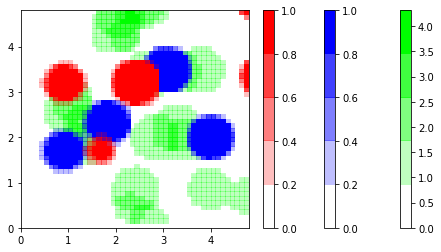

In [9]:
# Display test patch
patch_name = 'patch2237.pickle'
patch_path = '../../patches/test/' + str(patch_name)
pickle_in = open(patch_path,'rb')
patch = pickle.load(pickle_in)
pickle_in.close()
print(patch.shape)

# Carbon=Green,Nitrogen=Blue,Oxygen:Red,Sulphur=Yellow
colors = [(0,1,0,c) for c in np.linspace(0,1,100)]
cmapgreen = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)
colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)
colors = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)
colors = [(0,0.5,0.5,c) for c in np.linspace(0,1,100)]
cmapyellow = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)

# Create grid based patch
dx,dy=0.1,0.1
y,x = np.mgrid[slice(0.1,4.8+dy,dy),slice(0.1,4.8 +dx,dx)]

for slab in [12]:
    fig = plt.figure(figsize = (8,4))
    
    plt.pcolormesh(x, y,patch[0][slab], cmap=cmapgreen)
    plt.colorbar()
    #plt.clim(0,4)
    plt.pcolormesh(x, y,patch[1][slab], cmap=cmapblue)
    plt.colorbar()
    #plt.clim(0,1.6)
    plt.pcolormesh(x, y,patch[2][slab], cmap=cmapred)
    plt.colorbar()
    #plt.clim(0,1.0)
    #plt.pcolormesh(x,y,patch[3][slab], cmap=cmapyellow)
    #plt.colorbar()
    plt.axis([0, 4.8, 0, 4.8])
    plt.savefig( patch_name +'.png')

In [10]:
# Reconstruct patch using VAE
patch =  np.swapaxes(patch,0,1)
patch =  np.swapaxes(patch,1,2)
patch =  np.swapaxes(patch,2,3)
patch =  np.reshape(patch, (1,48,48,48,4))

decoded_patch = vae.predict(patch)
decoded_patch =  np.reshape(decoded_patch, (48,48,48,4))
decoded_patch =  np.swapaxes(decoded_patch,2,3)
decoded_patch =  np.swapaxes(decoded_patch,1,2)
decoded_patch =  np.swapaxes(decoded_patch,0,1)

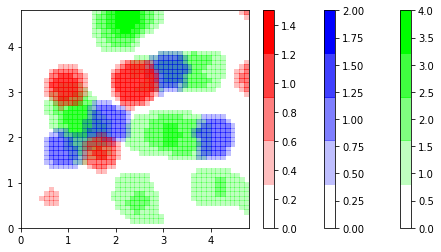

In [11]:
# Create image for reconstructed patch
dx,dy=0.1,0.1
y,x = np.mgrid[slice(0.1,4.8+dy,dy),slice(0.1,4.8 +dx,dx)]

for slab in [12]:
    fig = plt.figure(figsize = (8,4))
    # Blues
    
    plt.pcolormesh(x, y,decoded_patch[0][slab], cmap=cmapgreen)
    plt.colorbar()
    plt.clim(0,4)
    plt.pcolormesh(x, y,decoded_patch[1][slab], cmap=cmapblue)
    plt.colorbar()
    plt.clim(0,2)
    plt.pcolormesh(x, y,decoded_patch[2][slab], cmap=cmapred)
    plt.colorbar()
    plt.clim(0,1.5)
    #plt.pcolormesh(x,y,decoded_patch[3][slab], cmap=cmapyellow)
    #plt.colorbar()
    plt.axis([0, 4.8, 0, 4.8])  
    plt.savefig( 'decoded'+patch_name +'.png')